# 01 Import Libraries

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Importing Data

In [5]:
#creating path
path=r'/Users/serenakunzmann/Documents/CareerFoundry-Python/03-2025 Instacart Basket Analysis'

In [11]:
#importing ords_prods_merge with new derived and groupped columns
ords_prods_cust_2=pd.read_pickle(os.path.join(path,'Data','Prepared Data','Data Consistency','ords_prods_cust_merge_2.pkl'))

# 03 Creating Bar Charts

<Axes: xlabel='order_day_of_week'>

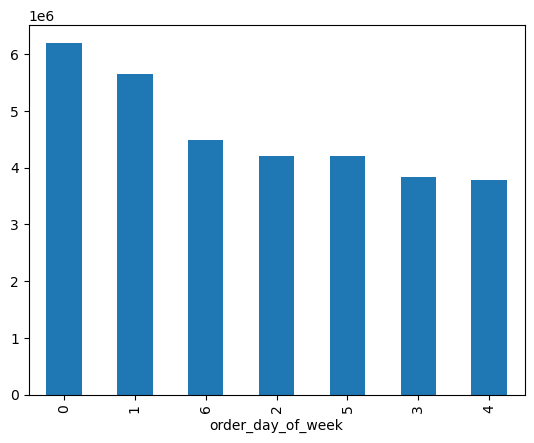

In [137]:
ords_prods_cust['order_day_of_week'].value_counts().plot.bar()

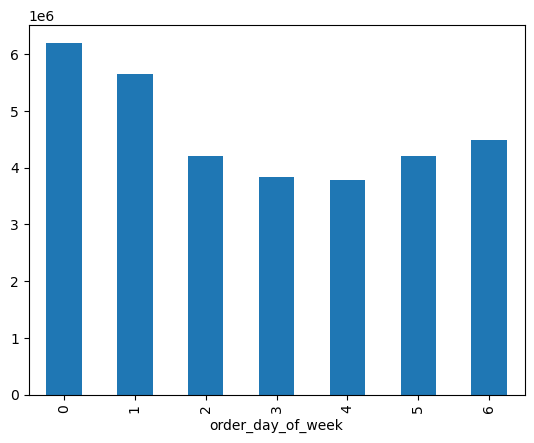

In [157]:
# sorting bar chart
bar_1=ords_prods_cust['order_day_of_week'].value_counts().sort_index().plot.bar()

In [159]:
#saving bar chart
bar_1.figure.savefig(os.path.join(path,'Analysis','Visualizations','bar_orders_dow_.png'))

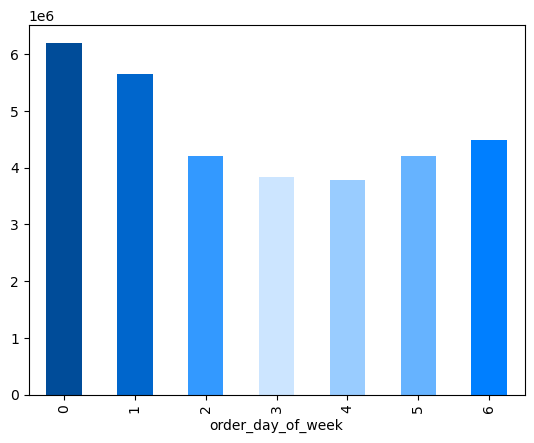

In [195]:
#adding colors to bar chart
bar_3=ords_prods_cust['order_day_of_week'].value_counts().sort_index().plot.bar(color=['#004c99','#0066cc','#3399ff','#cce5ff', '#99ccff', '#66b3ff', '#007fff', ])

In [197]:
#saving bar chart
bar_3.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_orders_dow_color.png'))

# 04 Creating Histograms

<Axes: ylabel='Frequency'>

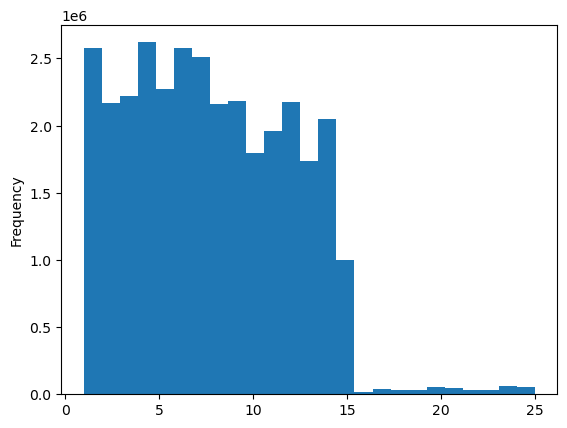

In [16]:
#creating histogram on prices with bins = 25
ords_prods_cust['prices'].plot.hist(bins = 25)

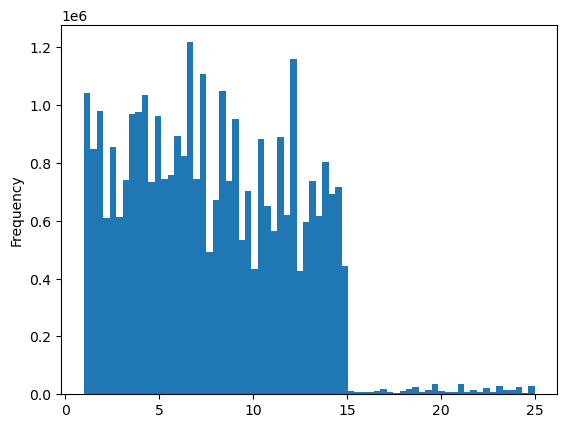

In [31]:
#creating Histogram on prices with bins=70
hist=ords_prods_cust['prices'].plot.hist(bins = 70)

# 05 Creating Scatterplot Charts

<Axes: xlabel='prices', ylabel='prices'>

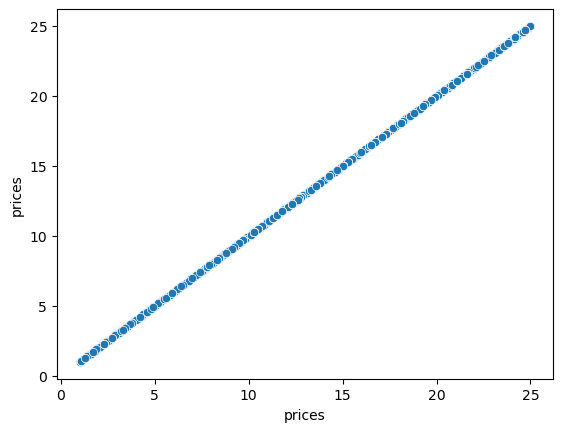

In [30]:
#creating scatterplot on prices
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_cust)

In [185]:
#saving scatterplot
plt.savefig(os.path.join(path, 'Analysis','Visualizations', 'sns_prices.png'))

<Figure size 640x480 with 0 Axes>

# 06 Creating a random sample subset

In [20]:
#creating random sample with 70/30 split
#creating a list holding true/false values to test np.random.rand() <=7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [22]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [26]:
#splitting dataframe into two samples
#big is 7-% split
big=ords_prods_cust[dev]
#small is 30% split
small=ords_prods_cust[~dev]

In [52]:
#checking if split was successful
len(ords_prods_cust)

32404859

In [54]:
len(big)+len(small)

32404859

In [56]:
#limiting small smaple to specific columns
ords_prods_cust_rand_sample = small[['order_day_of_week','prices']]

# 07 Creating Line Chart

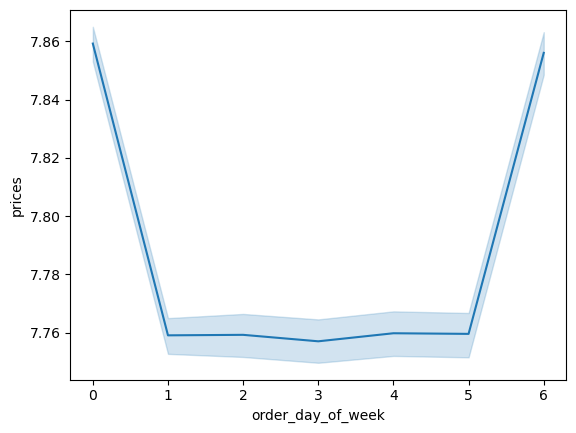

In [58]:
#creating line chart on small random sample subset looking at price variation across days of the week
line = sns.lineplot(data = ords_prods_cust_rand_sample, x = 'order_day_of_week',y = 'prices')

In [60]:
#exporting line chart
line.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_prices_dow.png'))

# 08 Task

In [36]:
ords_prods_cust.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,dependants_count,marital_status,income,true
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [ ]:
#You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column

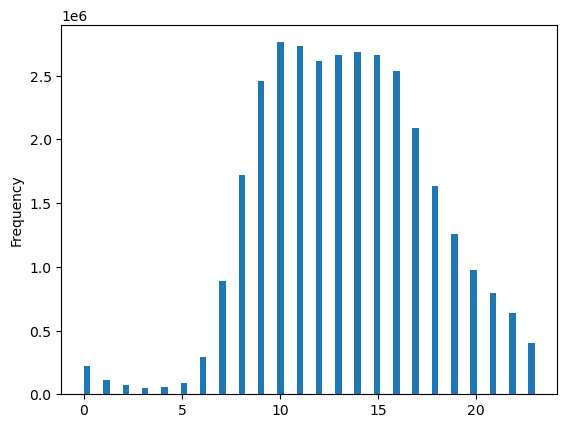

In [165]:
hist_2=ords_prods_cust['order_hour_of_day'].plot.hist(bins=70)

Observations: the order_hour_of_day histogram aboves tells us that sales are their highest at 10am and remain high until around 5pm when they start to decline

In [167]:
#saving and exporting order_hour_of_day historgam
hist_2.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [ ]:
#The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

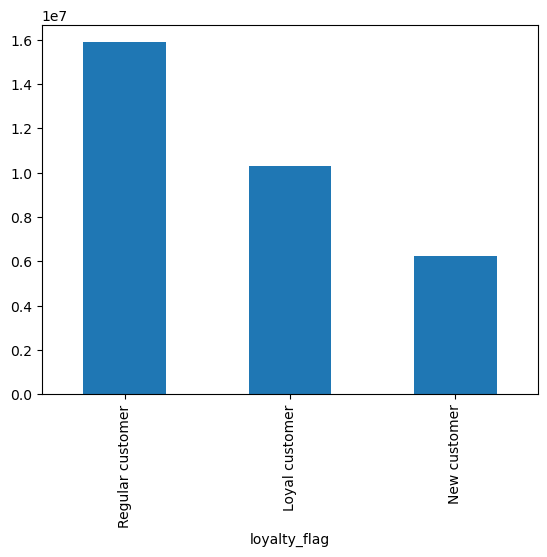

In [169]:
#creating bar chart for the loyalty_flag column
bar_2=ords_prods_cust['loyalty_flag'].value_counts().plot.bar()

In [171]:
#saving and exporting loyalty_flag bar chart
bar_2.figure.savefig(os.path.join(path,'Analysis','Visualizations', 'bar_loyalty_flag.png'))

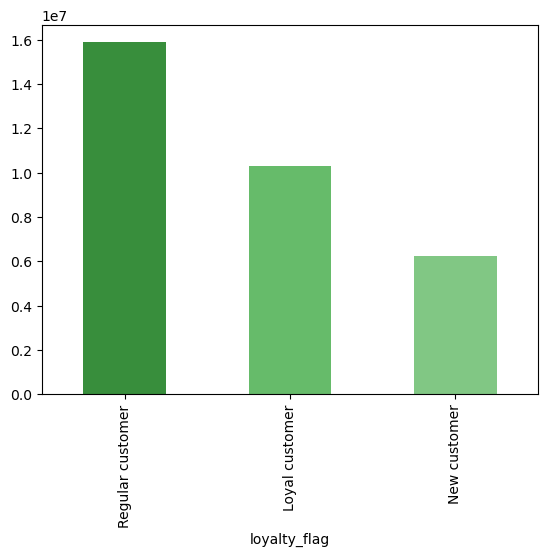

In [173]:
bar_3=ords_prods_cust['loyalty_flag'].value_counts().plot.bar(color=['#388e3c','#66bb6a','#81c784'])

Observations: The majority of our customers are Regular customers. Interestingly, we have more Loyal customers than New customers.

In [175]:
#saving and exporting the colored loyalty_flag bar chart
bar_3.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_loyalty_flag_color.png'))

In [ ]:
#Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

In [61]:
#refining the 30% rand sample to include only order_hour_of_day and prices
ords_prods_cust_rand_sample_2 = small[['order_hour_of_day','prices']]

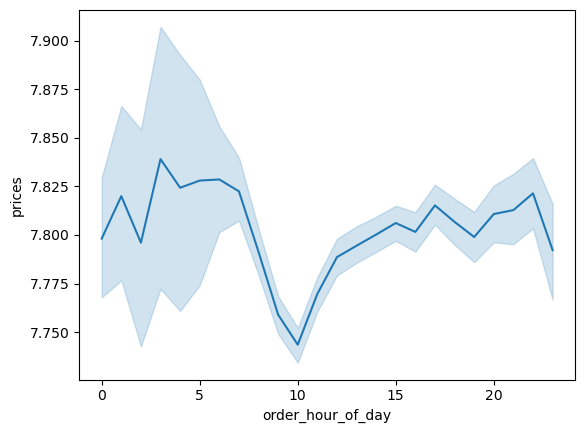

In [63]:
#creating line chart on order_hour_of_day and prices
line = sns.lineplot(data = ords_prods_cust_rand_sample_2, x = 'order_hour_of_day',y = 'prices')

Observations: Customer expediture is at the highest in the morning from 3am-7am, with the peak around 3am. Then expenditure starts to dip, with lowest expenditure at 10am.Then expenditure starts to rise into the evening and peaks again from 5- 10pm. 

In [65]:
#saving and exporting order_hour_of_day_price linechart
line.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_prices_order_hour_of_day.png'))

In [ ]:
#Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

In [79]:
#refining the 30% rand sample to include only marital_status and dependents_count
ords_prods_cust_rand_sample_4 = small[['age','dependants_count']]

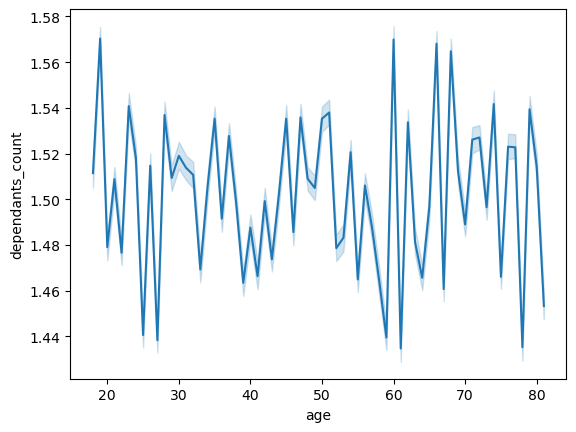

In [81]:
#creating line chart on small random sample subset looking at marital_status and dependents_count
line = sns.lineplot(data = ords_prods_cust_rand_sample_4, x = 'age',y = 'dependants_count')

Observation: there is not much variability of the number of dependents across age groups. 

In [119]:
#saving and exporting order_hour_of_day_age linechart
line.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_age_dep_count.png'))

In [ ]:
#You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function

<Axes: xlabel='age', ylabel='income'>

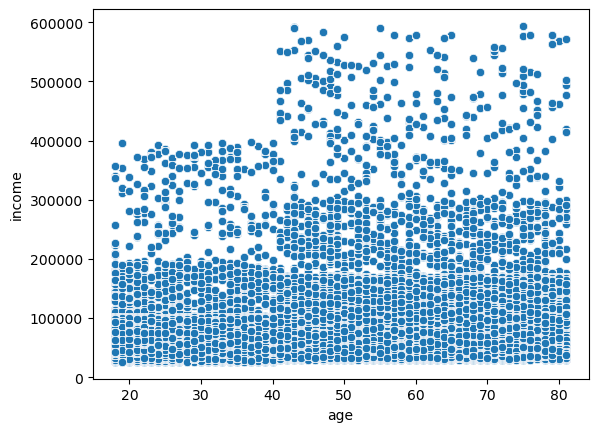

In [83]:
#creating scatterplot on age and income
sns.scatterplot(x = 'age', y = 'income',data = ords_prods_cust)

Obersvation: Spending power/income is significantly greater after age 40.

In [189]:
#saving scatterplot
plt.savefig(os.path.join(path, 'Analysis','Visualizations', 'sns_income_age.png'))

<Figure size 640x480 with 0 Axes>